# Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

# Initialize simulator

In [ ]:
from soft_info import RepCodeIQSimulator

DEVICE = 'ibm_sherbrooke'
DISTANCE = 7
ROUNDS = 7
OTHER_DATE = '2021-11-11'
_RESETS = False
LOGICAL = 0 # NOT NEEDED FOR EXTREME IQ BCS HARDCODED 0

_is_hex = True
if DEVICE == 'ibmq_mumbai':
    _is_hex = False

# Initialize simulator
simulator = RepCodeIQSimulator(provider, DISTANCE, ROUNDS, DEVICE, _is_hex=_is_hex, _resets = _RESETS, other_date=OTHER_DATE)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Searching for ibm_sherbrooke and 23.10.27_07h46_300pts_2std


# Get IQ data

In [ ]:
SHOTS = int(1e4)
NOISE_LIST = [3e-2, 0.8e-2, 1e-2, 3e-2] # [two-qubit-fidelity, reset error, measurement error, idle error]
# NOISE_LIST = None
P_AMBIG = 0.3

IQ_data= simulator.generate_IQ(SHOTS, noise_list=NOISE_LIST)
IQ_data_extreme = simulator.generate_extreme_IQ(SHOTS, P_AMBIG, noise_list=NOISE_LIST)

100%|██████████| 8871/8871 [00:03<00:00, 2761.02it/s]


# Pickle for other applications

In [ ]:
import pickle

with open('IQ_data.pkl', 'wb') as f:
    pickle.dump(IQ_data, f)

with open('IQ_data_extreme.pkl', 'wb') as f:
    pickle.dump(IQ_data_extreme, f)

with open('qubit_mapping.pkl', 'wb') as f:
    pickle.dump(simulator.qubit_mapping, f)

with open('stim_circ.pkl', 'wb') as f:
    pickle.dump(simulator.stim_circ, f)

# Simulator

# Decode IQ data

In [ ]:
import pymatching
import stim

model = simulator.stim_circ.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

# Using cpp kde

In [ ]:
import cpp_soft_info

_DETAILED = True

IQ_data = IQ_data[:10]
IQ_data_extreme = IQ_data_extreme[:10]

matching = pymatching.Matching.from_detector_error_model(model)
result = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                           common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                            p_offset = 1, p_multiplicator = 1, _ntnn_edges = not _RESETS)

matching = pymatching.Matching.from_detector_error_model(model)
result_extreme = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = not _RESETS)

print("num_errors:", result.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 132 out of 10000 shots for _RESETS = False
num_errors EXTREME: 265 out of 10000 shots for _RESETS = False


In [ ]:
p_meas = -1
# p_meas = 30e-2 

matching = pymatching.Matching.from_detector_error_model(model)
result_informed = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data[:],
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                           p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED, _ntnn_edges = True)

matching = pymatching.Matching.from_detector_error_model(model)
result_informed_extreme = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data_extreme[:],
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                             p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED, _ntnn_edges = True)

print("num_errors:", result_informed.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_informed_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)
         
# takes 1s

num_errors: 166 out of 10000 shots for _RESETS = False
num_errors EXTREME: 2413 out of 10000 shots for _RESETS = False


In [ ]:
matching = pymatching.Matching.from_detector_error_model(model)
result_flat = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, _detailed=_DETAILED)

matching = pymatching.Matching.from_detector_error_model(model)
result_flat_extreme = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data_extreme,
                                                         ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                                            simulator.processed_scaler_dict, _detailed=_DETAILED)

print("num_errors:", result_flat.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_flat_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 196 out of 10000 shots for _RESETS = False
num_errors EXTREME: 3650 out of 10000 shots for _RESETS = False


# Plot the results

In [ ]:
print("\nIQ:", result.indices, "\nFlat:", result_flat.indices, "\nInformed", result_informed.indices)
print("\nIQ EXTREME:", result_extreme.indices, "\nFlat EXTREME:", result_flat_extreme.indices, "\nInformed EXTREME", result_informed_extreme.indices)


IQ: [42, 65, 66, 751, 768, 948, 997, 1029, 1049, 1076, 1095, 1198, 1335, 1471, 1578, 1588, 1807, 1889, 1897, 1954, 2115, 2274, 2305, 2327, 2342, 2591, 2640, 2677, 2824, 2850, 2901, 2984, 3015, 3059, 3120, 3137, 3183, 3253, 3316, 3340, 3440, 3467, 3516, 3746, 3844, 3863, 3886, 3896, 3960, 4053, 4268, 4461, 4507, 4592, 4621, 4674, 4693, 4715, 4717, 4749, 4840, 4935, 5052, 5176, 5224, 5258, 5265, 5332, 5365, 5386, 5425, 5723, 5785, 5789, 5848, 5925, 5938, 6095, 6180, 6222, 6234, 6240, 6459, 6526, 6548, 6699, 6841, 6899, 6914, 6953, 6957, 7016, 7157, 7181, 7233, 7371, 7378, 7528, 7657, 7710, 7939, 7974, 8116, 8225, 8502, 8644, 8651, 8677, 8841, 8916, 8987, 8992, 9142, 9156, 9250, 9297, 9336, 9357, 9370, 9378, 9523, 9599, 9634, 9647, 9693, 9744, 9814, 9828, 9850, 9863, 9877, 9879] 
Flat: [5, 42, 65, 66, 136, 616, 698, 751, 767, 768, 776, 948, 1049, 1076, 1095, 1132, 1165, 1283, 1335, 1425, 1471, 1489, 1664, 1889, 1897, 1944, 1954, 2115, 2305, 2337, 2342, 2431, 2443, 2591, 2640, 2761, 2817,

-----IQ True decoding -----


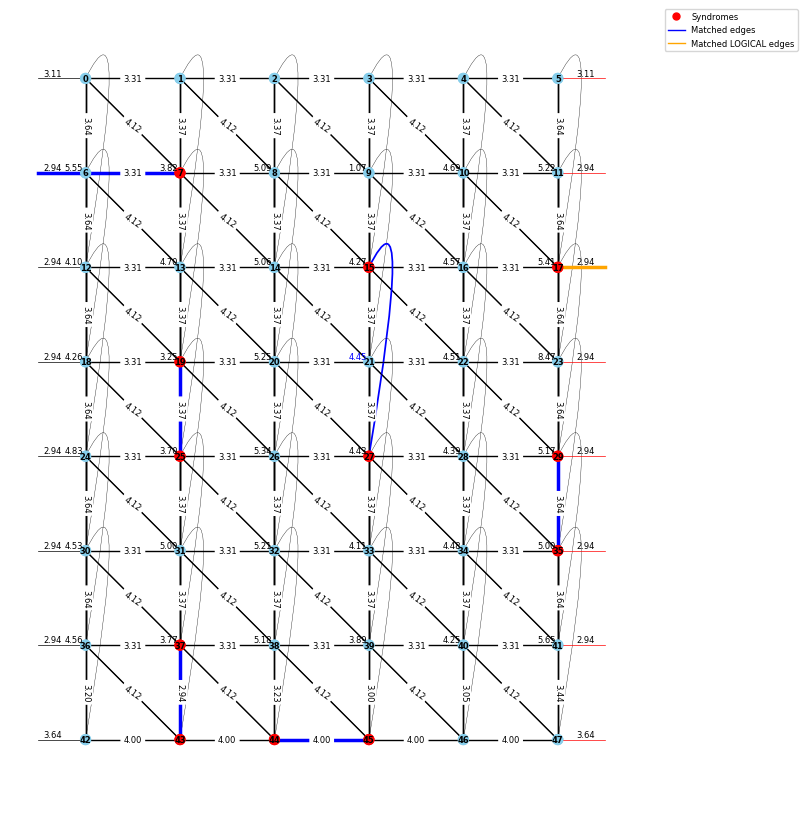

-----flat False decoding-----


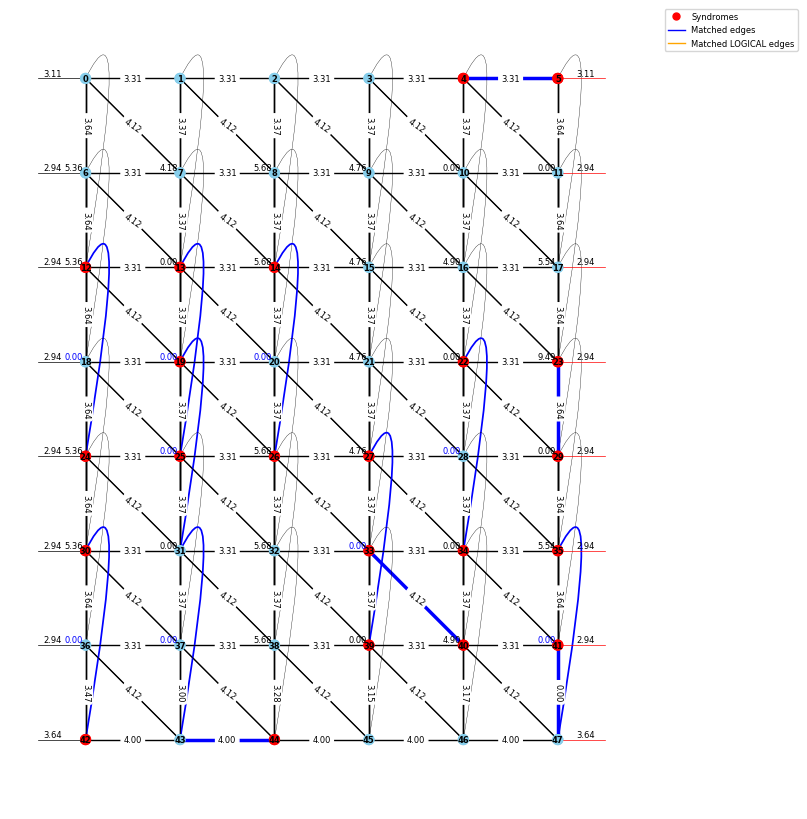

-----INFORMED True decoding-----


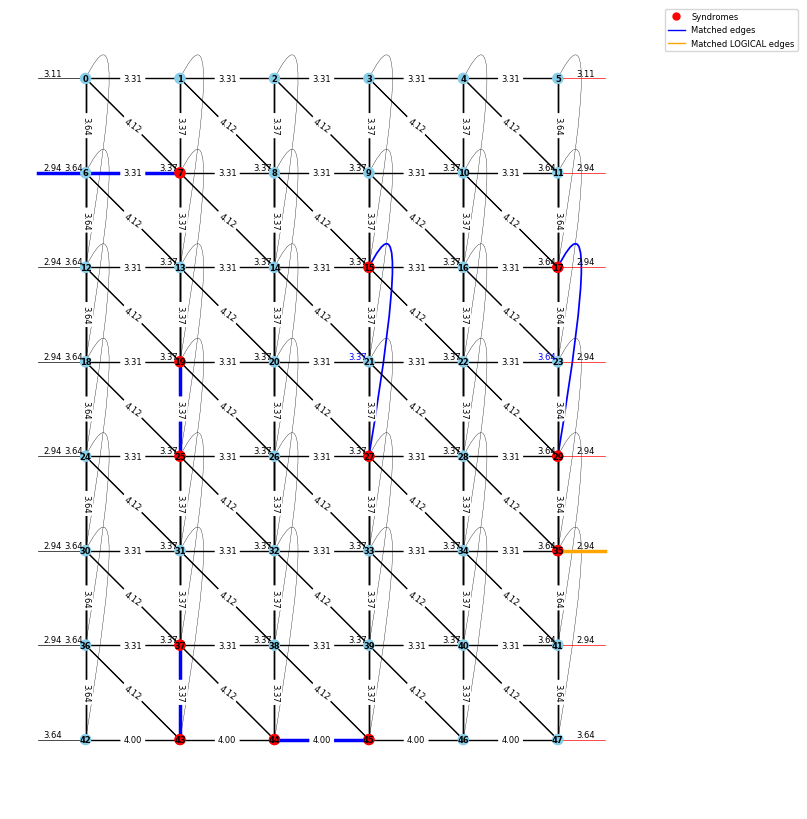

In [ ]:
from soft_info import draw_matching_graph


index = 9981

fig_size = (4, 13)
fig_size = (8, 8)
scale_factor = 0.5

to_be_result = result
details = to_be_result.error_details[index]
print(f"-----IQ {bool(not (index in to_be_result.indices))} decoding -----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_extreme
details = to_be_result.error_details[index]
print(f"-----flat {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_informed
details = to_be_result.error_details[index]
print(f"-----INFORMED {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)


In [ ]:
informed_not_in_iq = sorted(set(result_informed.indices) - set(result.indices))
print("indices that are in informed but not in IQ with len:", len(informed_not_in_iq))
print(informed_not_in_iq)
iq_not_in_informed = sorted(set(result.indices) - set(result_informed.indices))
print("indices that are in IQ but not in informed with len:", len(iq_not_in_informed))
print(iq_not_in_informed)

print()

iq_not_in_flat = sorted(set(result.indices) - set(result_flat.indices))
print("indices that are in IQ but not in flat with len:", len(iq_not_in_flat))
print(iq_not_in_flat)
flat_not_in_iq = sorted(set(result_flat.indices) - set(result.indices))
print("indices that are in flat but not in IQ with len:", len(flat_not_in_iq))
print(flat_not_in_iq)

indices that are in informed but not in IQ with len: 60
[458, 764, 767, 901, 934, 1046, 1165, 1195, 1283, 1425, 1562, 1671, 1718, 2411, 2432, 2589, 2729, 2869, 3154, 3161, 3246, 3431, 3536, 4065, 4173, 4300, 4549, 4686, 4953, 5016, 5589, 5630, 6104, 6155, 6320, 6470, 6576, 6763, 6774, 6796, 6959, 7044, 7143, 7349, 7354, 7453, 7614, 8035, 8247, 8326, 8599, 8896, 8954, 9137, 9323, 9491, 9533, 9662, 9773, 9885]
indices that are in IQ but not in informed with len: 26
[751, 997, 1095, 1198, 1889, 2274, 2984, 3059, 3120, 3340, 4053, 4693, 4840, 5224, 5785, 5925, 7974, 8116, 8502, 8644, 8916, 9297, 9336, 9370, 9744, 9877]

indices that are in IQ but not in flat with len: 40
[997, 1029, 1198, 1578, 1588, 1807, 2274, 2327, 2677, 2824, 2901, 2984, 3120, 3137, 3340, 3440, 3863, 3896, 3960, 4053, 4268, 4461, 4693, 4749, 5723, 6548, 6841, 6899, 7528, 8116, 8225, 8502, 8644, 8987, 8992, 9523, 9634, 9647, 9877, 9879]
indices that are in flat but not in IQ with len: 104
[5, 136, 616, 698, 767, 776, 11

# Analyse specific shots

{'0000000 000001 000000 001000 001000 000000 000000 000000': 1}


100%|██████████| 169/169 [00:00<00:00, 2354941.45it/s]

mean time edge weight: 3.1121797526416013

[(2, 14), (5, 17), (19, 7), (12, -1), (11, 23), (33, 21), (33, 45), (27, 39), (34, 35), (36, 37), (38, 44)]
-----IQ-----


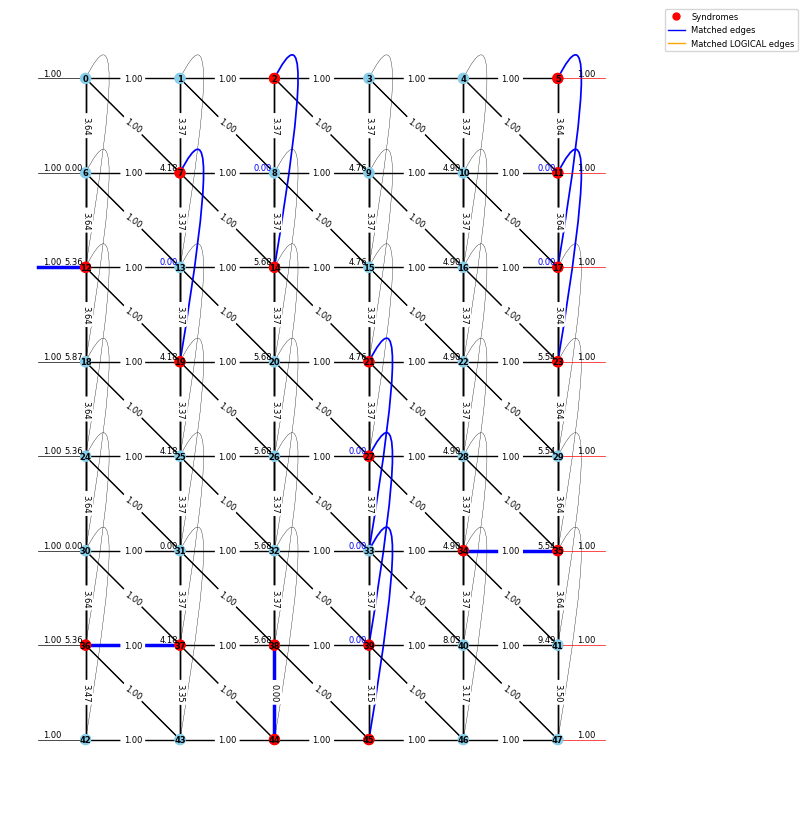

In [ ]:
from tqdm import tqdm

index = 83
IQ_data_new = IQ_data[index:index+1]

esult = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

print(cpp_soft_info.get_counts(IQ_data_new, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict, ROUNDS))



to_be_result = esult
details = to_be_result.error_details[0]


mean_edge_weight = 0
num_time_edges = 0
for edge in tqdm(matching.edges()):
    src_node, tgt_node, data = edge
    if src_node == None or tgt_node == None:
        continue
    if src_node == tgt_node - (DISTANCE-1):
        mean_edge_weight += data["weight"]
        num_time_edges += 1

print("mean time edge weight:", mean_edge_weight / num_time_edges)

print()
print(details.matched_edges)

print("-----IQ-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)